In [192]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn as sfp
import sfp_nsdsyn.visualization as vis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load parameter files

In [247]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'nsdsyn'
stat = 'mean'
full_ver= [True]
sn_list = np.arange(1,9)
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1','V2','V3']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'
sn = 1

In [259]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', ['V1'])
final_params = all_model_history.query('epoch == 29999')

 ## melt final_params variable

In [260]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

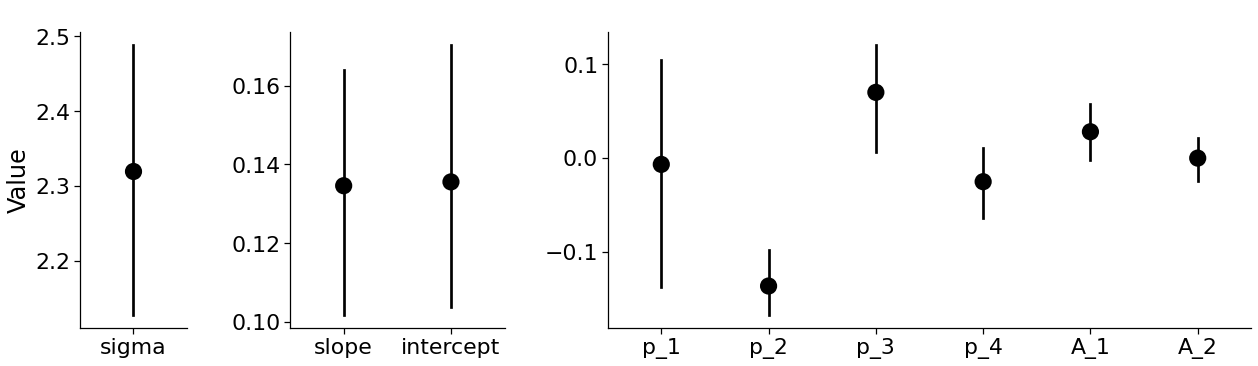

In [261]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group)

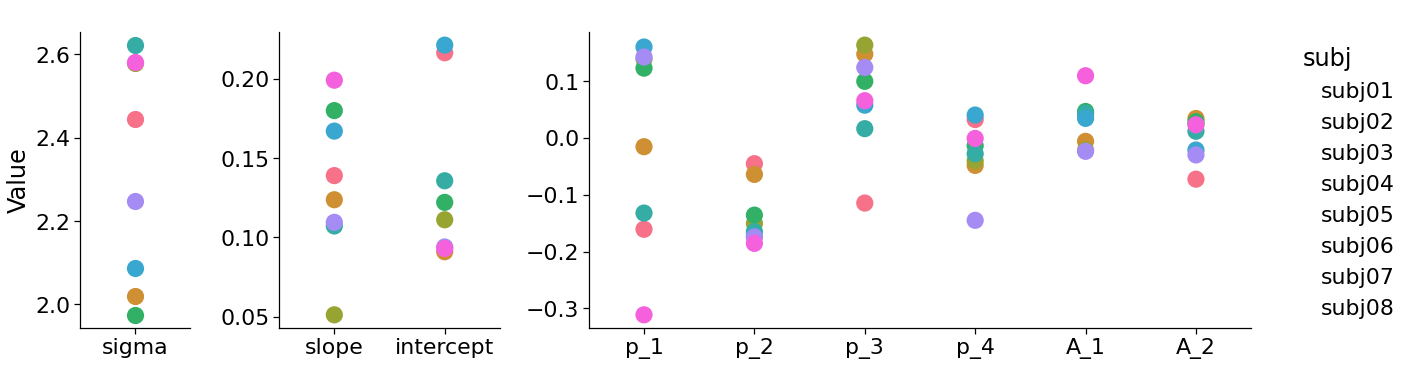

In [263]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group)

# Preferred period plots (lineplot, polar plot)
## Shape data - we now need to calculate predicted preferred period (deg).
1. Load in final parameter information (slope $a$, intercept $b$)
2. we load in each stimulus information (stim orientation $\theta_l$) ....???
3. Make continuous eccentricity $r_v$ df
4. Make continuous angle $\theta_v$ df
5. Merge everything (1,2,3,&4)
6. Plug in those value to make $P_v$
7. make a figure for preferred period vs. eccentricity


## Play with the effect of averaging orientation & angle on Pv values

In [281]:
np.cos()

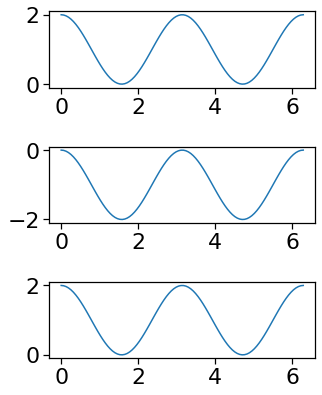

In [301]:
def get_Pv(ori, angle):
    formula = np.cos(2*ori) + np.cos(4*angle)
    return formula

ori = np.linspace(0,2*np.pi, 100)
# When angle == 0, we are adding a constant np.cos(4*0) which is 1. That will make the formula value maximum. On the other hand, when angle == 1/4*(np.pi), we are adding the smallest constant possible, which is np.cos(4*(1/4)*np.pi) == -1. This will make the value minimum.
angle_list = [0, 45, 90]
fig, axes = plt.subplots(len(angle_list), 1, figsize=(5,6))
for i, angle in enumerate(angle_list):
    axes[i].plot(ori, get_Pv(ori, np.deg2rad(angle)))
plt.tight_layout()

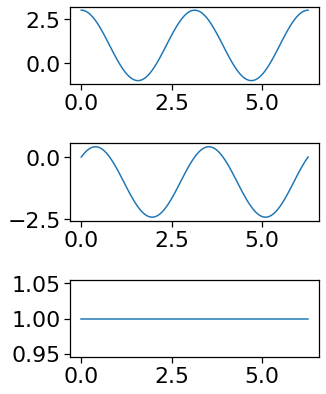

In [304]:
def get_Pv(ori, angle):
    formula = np.cos(2*ori) + np.cos(4*angle) + np.cos(2*(angle - ori))
    return formula

ori = np.linspace(0,2*np.pi, 100)
# When angle == 0, we are adding a constant np.cos(4*0) which is 1. That will make the formula value maximum. On the other hand, when angle == 1/4*(np.pi), we are adding the smallest constant possible, which is np.cos(4*(1/4)*np.pi) == -1. This will make the value minimum.
angle_list = [0, 45, 90]
fig, axes = plt.subplots(len(angle_list), 1, figsize=(5,6))
for i, angle in enumerate(angle_list):
    axes[i].plot(ori, get_Pv(ori, np.deg2rad(angle)))
plt.tight_layout()

In [309]:
np.flip(angle)

array([6.28318531, 6.21971879, 6.15625227, 6.09278575, 6.02931923,
       5.96585272, 5.9023862 , 5.83891968, 5.77545316, 5.71198664,
       5.64852012, 5.58505361, 5.52158709, 5.45812057, 5.39465405,
       5.33118753, 5.26772102, 5.2042545 , 5.14078798, 5.07732146,
       5.01385494, 4.95038842, 4.88692191, 4.82345539, 4.75998887,
       4.69652235, 4.63305583, 4.56958931, 4.5061228 , 4.44265628,
       4.37918976, 4.31572324, 4.25225672, 4.1887902 , 4.12532369,
       4.06185717, 3.99839065, 3.93492413, 3.87145761, 3.8079911 ,
       3.74452458, 3.68105806, 3.61759154, 3.55412502, 3.4906585 ,
       3.42719199, 3.36372547, 3.30025895, 3.23679243, 3.17332591,
       3.10985939, 3.04639288, 2.98292636, 2.91945984, 2.85599332,
       2.7925268 , 2.72906028, 2.66559377, 2.60212725, 2.53866073,
       2.47519421, 2.41172769, 2.34826118, 2.28479466, 2.22132814,
       2.15786162, 2.0943951 , 2.03092858, 1.96746207, 1.90399555,
       1.84052903, 1.77706251, 1.71359599, 1.65012947, 1.58666

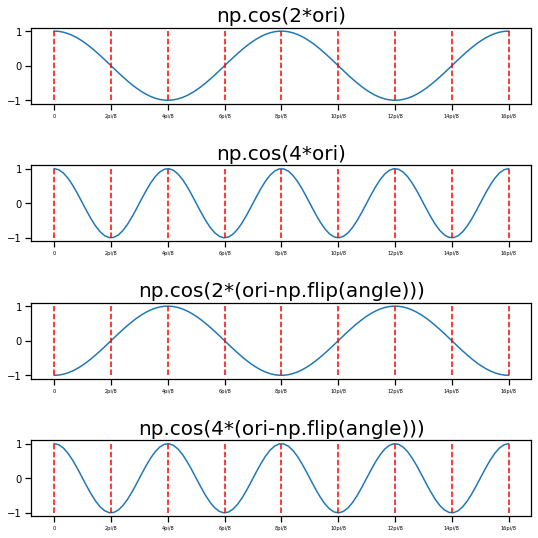

In [353]:
ori = np.linspace(0,2*np.pi, 100)
angle = np.linspace(0,2*np.pi, 100)
value = [2*ori, 4*angle, 2*(ori-np.deg2rad(90)), 4*(ori-np.deg2rad(90))]
title_list = ['2*ori', '4*ori', '2*(ori-np.flip(angle))', '4*(ori-np.flip(angle))']

fig, axes = plt.subplots(4, 1, figsize=(8,8))
plt.rc('ytick', labelsize=10)
plt.rc('axes', titlesize=20, labelsize=20)
for i, val in enumerate(value):
    axes[i].plot(ori, np.cos(val))
    axes[i].set_title(f'np.cos({title_list[i]})')
    axes[i].vlines(x=np.linspace(0,2*np.pi, 9), ymin=-1, ymax=1, color='r', ls='--')
    #axes[i].set_xlim((0,2*np.pi))
    axes[i].set_xticks(np.linspace(0,2*np.pi, 9), ['0', '2pi/8', '4pi/8','6pi/8','8pi/8','10pi/8','12pi/8','14pi/8','16pi/8'])
fig.tight_layout()

In [264]:
roi='V1'
subj_df = sfp.utils.load_df(sn, df_dir=f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}', df_name=f'stim_voxel_info_df_vs-pRFsigma_{roi}_{stat}.csv', dataset=dataset)
subj_df.head()
print(subj_df.angle.min(), subj_df.angle.max())

0.0015421653268997 6.28249448319282


### 2. Load in stim_info

In [265]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates(subset=stim_info.drop(columns='phase').columns.tolist())

### 3. Make continuous eccentricity df


In [ ]:
subj_df = final_params.query('subj == "subj01"')
all_ecc_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(subj_df, ecc_range=(0,5), repeat=100, col_name='eccentricity')
all_ecc_final_params.shape

### 4. Make continuous angle df


In [360]:
all_angle_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(all_ecc_final_params, ecc_range=(0,np.pi*2), repeat=100, col_name='angle')
all_angle_final_params.shape

(10000, 18)

In [362]:
all_ori_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(all_angle_final_params, ecc_range=(0,np.pi*2), repeat=100, col_name='ori')
all_ori_final_params.shape

(1000000, 19)

In [363]:
all_ori_final_params['Pv'] = all_ori_final_params.apply(lambda row: sfp.two_dimensional_model.get_Pv(row, full_ver=True), axis=1)

In [365]:
all_ori_final_params[['eccentricity','angle','ori','Pv']].head()

,eccentricity,angle,ori,Pv
0,0.000000,0.0,0.0,0.153992
1,0.050505,0.0,0.0,0.158986
2,0.101010,0.0,0.0,0.163980
3,0.151515,0.0,0.0,0.168975
4,0.202020,0.0,0.0,0.173969


In [368]:
vis.plot_2D_model_results.plot_preferred_period(all_ori_final_params, params, group)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:xlabel='eccentricity', ylabel='Pv'>

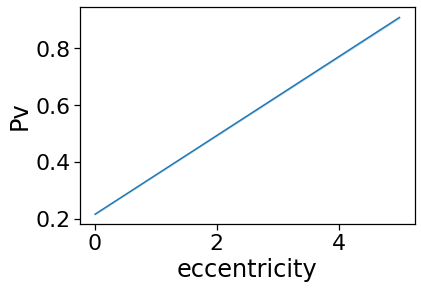

In [374]:
sns.lineplot(data=all_ori_final_params, x='eccentricity',y='Pv', err_style='band')